## Logistic Regression
$$\log\left(\frac{p}{1-p}\right) = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$$  
* (p) is the probability of the positive class!  
* B0, ..., Bn are the regression coefficients!  
* x1, ..., xn are the feature variables!  

### Main Question

> **Which of the previous customers will buy a brand new car?**  

Once we predict that a customer wants to buy a brand new car, the advertisement team will post ads of this brand new car on social media and these ads will  
be targeted to customers where we predict they are going to buy the brand new car! 

### Data Understanding  

**1.0. What is the domain area of the dataset?**  
The dataset *social_network_ads.csv* contains information collected by a car sale company!  

**2.0. Which data format?**  
The dataset is in *csv* format!  

**2.1. Do the files have headers or another file describing the data?**  
The files does have headers that describes the data! Each column has a name that describes the data it contains!  

**2.2. Are the data values separated by commas, semicolon, or tabs?**  
The data values are separated by commas!  
Example: 
*User ID,Gender,Age,EstimatedSalary,Purchased*
*15624510,Male,19,19000,0*

**3.0 How many features and how many observations does the dataset have?**  
The dataset has:  
* 5 features or columns!
* 400 observations or rows!  

**4.0 Does it contain numerical features? How many?**  
Yes it contains 3 numerical features!  

**5.0. Does it contain categorical features?  How many?**  
Yes it contains 1 categorical features!  

In [33]:
# Importing Necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [34]:
dataset = pd.read_csv("../Datasets/Social_Network_Ads.csv")

In [35]:
RANDOM_STATE = 42

### Basic Exploratory Data Analysis

In [36]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [37]:
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [38]:
print(f"Number of features in the dataset is {dataset.shape[1]} and the number of observations/rows in the dataset is {dataset.shape[0]}")

Number of features in the dataset is 5 and the number of observations/rows in the dataset is 400


### Handling Missing Values

In [39]:
dataset.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [40]:
dataset.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

### Model Building

#### Data Pre-processing

In [41]:
X = dataset.iloc[:, 2:4]
y = dataset.iloc[:, -1]

X.shape, y.shape

((400, 2), (400,))

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((320, 2), (80, 2), (320,), (80,))

In [43]:
print(X)

     Age  EstimatedSalary
0     19            19000
1     35            20000
2     26            43000
3     27            57000
4     19            76000
5     27            58000
6     27            84000
7     32           150000
8     25            33000
9     35            65000
10    26            80000
11    26            52000
12    20            86000
13    32            18000
14    18            82000
15    29            80000
16    47            25000
17    45            26000
18    46            28000
19    48            29000
20    45            22000
21    47            49000
22    48            41000
23    45            22000
24    46            23000
25    47            20000
26    49            28000
27    47            30000
28    29            43000
29    31            18000
30    31            74000
31    27           137000
32    21            16000
33    28            44000
34    27            90000
35    35            27000
36    33            28000
37    30    

### Feature Scaling Needed

X- variables have different range, the one with a large range can influence more the model! 

> The goal is to ensure that all features have a similar scale so that no particular feature dominates others when a model is being trained!  

In [44]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

### Checking if there is class imbalance in the y-variable

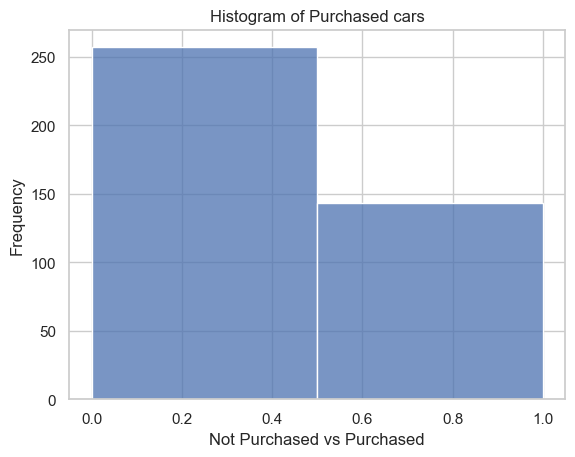

In [45]:
sns.set_theme(style='whitegrid') #Set the style of seaborn for the plot!
fig, ax = plt.subplots() #Create a figure and axis for the plot!
sns.histplot(dataset['Purchased'], bins=2, ax=ax) #Plotting the histogram using seaborn
# Set the title and labels
ax.set_title('Histogram of Purchased cars')
ax.set_xlabel('Not Purchased vs Purchased')
ax.set_ylabel('Frequency')
# Show the plot
plt.show()

* NotPurchased has approximately 260 instances!  
* Purchased has approximately 140 instances!  
> There is an imbalance here, as othe *NotPurchased* class is nearly twice as frequent as the *Purchased* class!

### Training the Logistic Regression model on the training set

In [46]:
logistic_regression_model = LogisticRegression(random_state=RANDOM_STATE)
logistic_regression_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

### Predicting the test set results

In [47]:
y_pred = logistic_regression_model.predict(X_test)
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)

     Actual  Predicted
209       0          0
280       1          1
33        0          0
210       1          1
93        0          0
84        0          0
329       1          1
94        0          0
266       0          0
126       0          0
9         0          0
361       1          1
56        0          0
72        0          0
132       0          0
42        0          1
278       1          1
376       0          1
231       0          0
385       1          1
77        0          0
15        0          0
391       1          0
271       1          1
0         0          0
396       1          0
114       0          1
225       0          0
262       1          1
104       0          0
395       1          0
193       0          0
261       1          1
57        0          0
232       1          1
116       0          0
113       0          0
342       0          0
158       0          0
141       0          0
381       1          0
55        0          0
76        0

### Making the confusion matrix

In [48]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[49  3]
 [ 8 20]]


|                 | Predicted NotPurchased (0) | Predicted Purchased (1) |
|-----------------|----------------------------|-------------------------|
| **Actual NotPurchased (0)** | 49                           | 3                        |
| **Actual Purchased (1)**     | 8                            | 20                       |


From this matrix, we can interpret the following:
- **True Negatives (TN)**: 49     ------      (Actual 0 correctly predicted as 0)
- **False Positives (FP)**: 3     ------      (Actual 0 incorrectly predicted as 1)
- **False Negatives (FN)**: 8     ------      (Actual 1 incorrectly predicted as 0)
- **True Positives (TP)**: 20     ------      (Actual 1 correctly predicted as 1)

In [54]:
acc_score = accuracy_score(y_test, y_pred)
print("The accuracy score of the model is: ", acc_score)

The accuracy score of the model is:  0.8625
